# Baseline model to simulate outbreak

#### Author: Yiran Jing

#### Date: Feb 2020


## Contents:
1. EDA and Feature Engineering
1. Polynomial regression
   1. Chinese total comfirmed cases
   2. For each province
   
## Summary
For Polynomial regression, 
- China total comfirmed cases, optimal degree is 2, and seems fit well.
- Hubei only, ptimal degree is 2, and seems fit well.
- Ex-hubei fit better when degree = 3 

In [1]:
import pandas as pd
import numpy as np
import operator
import matplotlib.pyplot as plt
import pandas as pd
import pandas
import datetime
import matplotlib.dates as mdates
from helper_fun_model import *
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
import warnings
warnings.filterwarnings('ignore')

In [2]:
## Load data 
DXYArea = pd.read_csv("../data/DXYArea.csv")
DXYArea = add_days(DXYArea) # add the number of days after 2019-12-08
DXYArea.tail(3) # check new

,provinceName,cityName,confirmed,cured,dead,updateTime,updateDate,Days
5681,Heilongjiang Province,Hegang,3,0,0,2020-02-08 16:32:08.225,2020-02-08,62
5682,Heilongjiang Province,Heihe,2,0,0,2020-02-08 16:32:08.225,2020-02-08,62
5683,Heilongjiang Province,Qiqihar,27,0,0,2020-02-08 16:32:08.225,2020-02-08,62


In [3]:
Train, Test = split_train_test_by_date(DXYArea)

Train dataset: data before 2020-02-06 00:00:00 
Test dataset: the last 3 days


### EDA

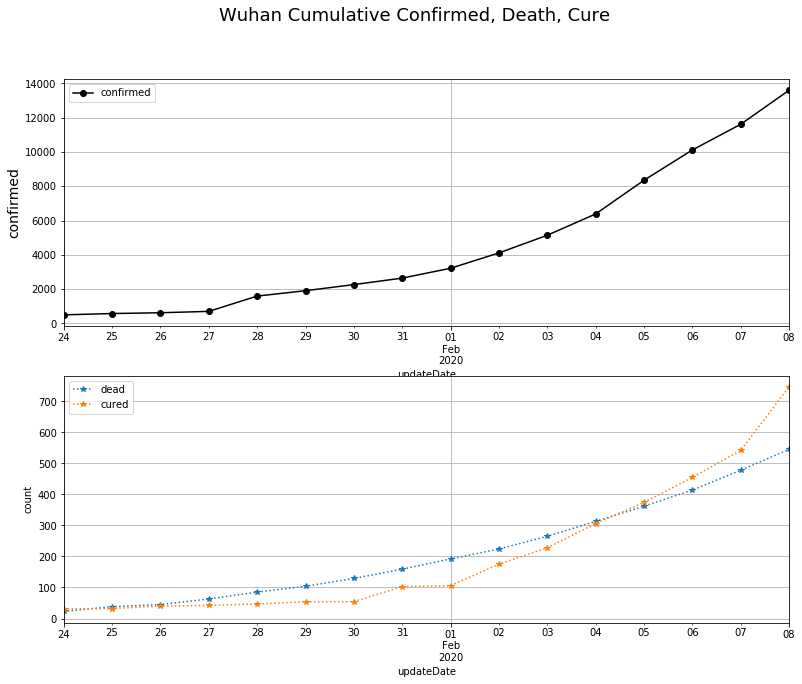

In [4]:
# Input City name or Province name
draw_city_trend("Wuhan", DXYArea) # city 

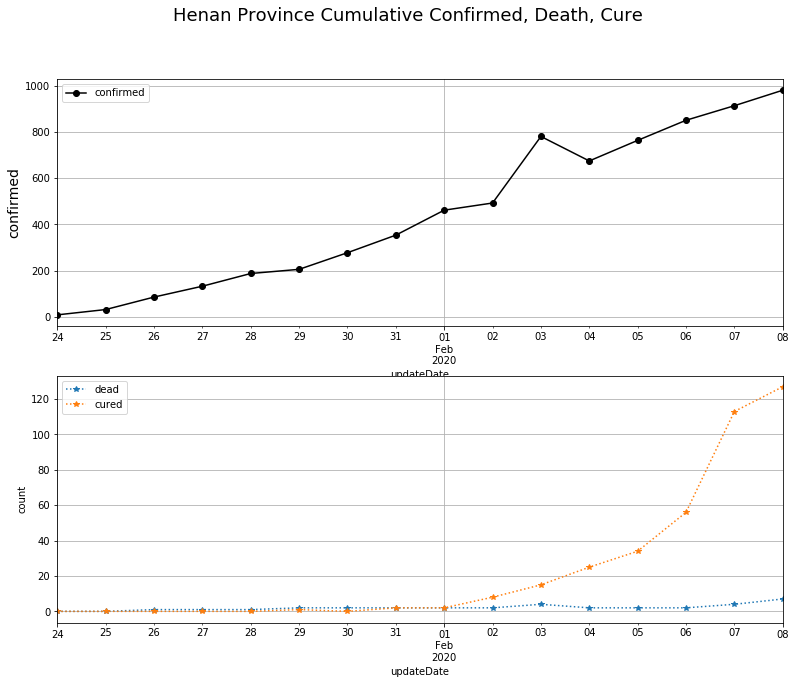

In [5]:
draw_province_trend("Henan Province", DXYArea)

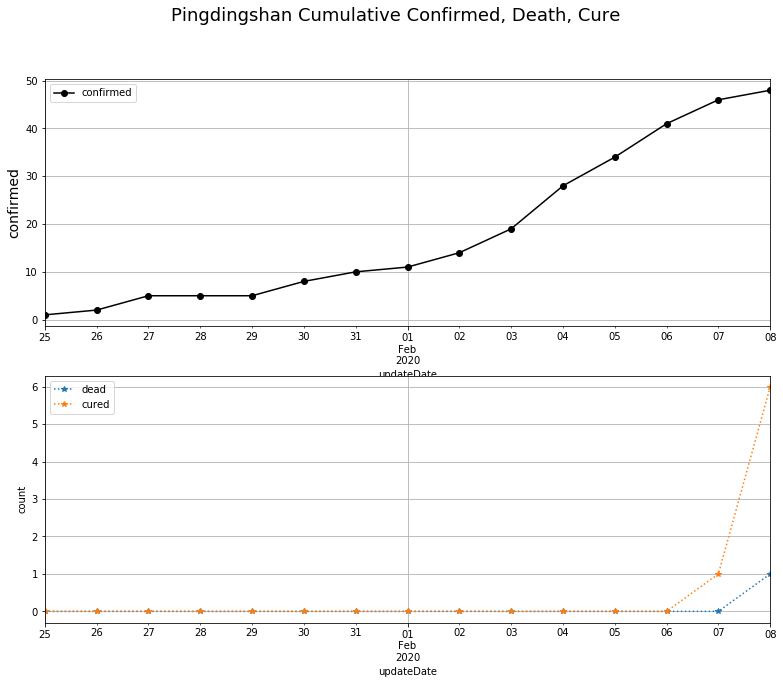

In [6]:
draw_city_trend("Pingdingshan", DXYArea) # my hometown 

## Polynomial regression

In [7]:
"""
Sum up all province  
"""
# China total
overall_df = pd.DataFrame(DXYArea.groupby(['updateDate']).agg({'confirmed': "sum",
                                                                'cured': "sum",
                                                                'dead': 'sum',
                                                                'Days': 'mean'})).reset_index()
Train, Test = split_train_test_by_date(overall_df)

X_train = Train['Days']
y_train = Train['confirmed']
X_test =  Test['Days']
y_test = Test['confirmed']

Train dataset: data before 2020-02-06 00:00:00 
Test dataset: the last 3 days


### Case1: Overall 

Degree 1:
RMSE of training set is 1636.1240421294938
R2 score of training set is 0.9514062934502221

RMSE of test set is 6330.760721644473
R2 score of test set is -4.677320602992325
---------------------------------------

Degree 3:
RMSE of training set is 176.78592048187707
R2 score of training set is 0.9994326606300072

RMSE of test set is 1204.3303584242615
R2 score of test set is 0.7945420787945533
---------------------------------------

Degree 2:
RMSE of training set is 185.82544244205138
R2 score of training set is 0.9993731582349386

RMSE of test set is 749.7320713764573
R2 score of test set is 0.9203760350739139
---------------------------------------



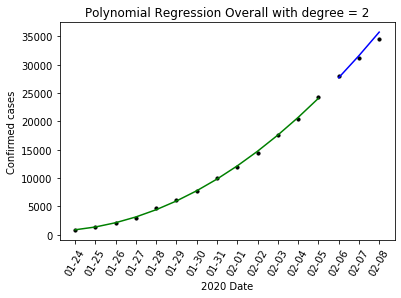

In [8]:
"""
Model selection:
  find optimal degree level
  Then draw plot using the optimal degree
"""
# select the best degree 
create_polynomial_regression_model(1, "Overall", overall_df, X_train, X_test, y_train, y_test, draw_plot = False)
create_polynomial_regression_model(3, "Overall", overall_df, X_train, X_test, y_train, y_test, draw_plot = False)
create_polynomial_regression_model(2, "Overall", overall_df, X_train, X_test, y_train, y_test, draw_plot = True)

**based on the result above, we can clearly see that degree = 2 gives us best estimation. So now we use degree = 2 to predict the next 4 days**

Degree 2:
RMSE of training set is 297.6580589182098
R2 score of training set is 0.9992487131906561

---------------------------------------



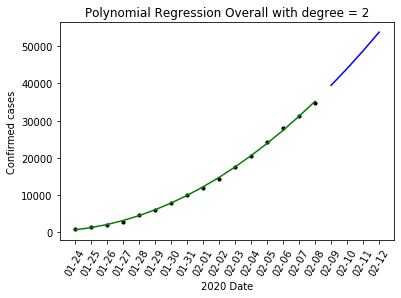

In [9]:
forecast_next_4_days(2, "Overall", overall_df)

### Case2: Each Province

Train dataset: data before 2020-02-06 00:00:00 
Test dataset: the last 3 days
Degree 1:
RMSE of training set is 1400.4742561046387
R2 score of training set is 0.9226740677396366

RMSE of test set is 5992.177104992286
R2 score of test set is -6.69014841400451
---------------------------------------

Degree 3:
RMSE of training set is 163.6631392992854
R2 score of training set is 0.9989439690187146

RMSE of test set is 1495.2000531131437
R2 score of test set is 0.521189079294307
---------------------------------------

Degree 2:
RMSE of training set is 237.2133877906418
R2 score of training set is 0.9977815313454274

RMSE of test set is 434.0727925730869
R2 score of test set is 0.9596456301170528
---------------------------------------



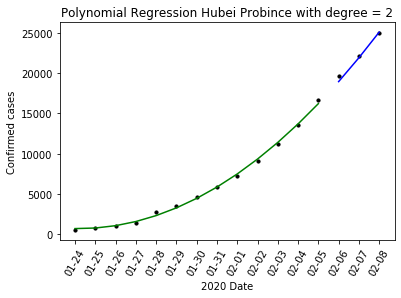

Degree 2:
RMSE of training set is 297.6580589182098
R2 score of training set is 0.9992487131906561

---------------------------------------



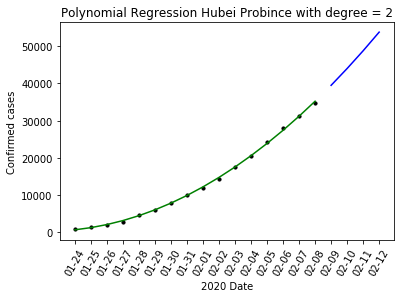

In [10]:
# See Hubei Province 
Hubei= DXYArea[DXYArea['provinceName'] == 'Hubei Province']
 
X_train, X_test, y_train, y_test = data_processing(Hubei)    

# select the best degree 
create_polynomial_regression_model(1, "Hubei Probince", overall_df, X_train, X_test, y_train, y_test, draw_plot = False)
create_polynomial_regression_model(3, "Hubei Probince", overall_df, X_train, X_test, y_train, y_test, draw_plot = False)
create_polynomial_regression_model(2, "Hubei Probince", overall_df, X_train, X_test, y_train, y_test, draw_plot = True)

forecast_next_4_days(2, "Hubei Probince", overall_df)

Train dataset: data before 2020-02-06 00:00:00 
Test dataset: the last 3 days
Degree 1:
RMSE of training set is 285.14341796386464
R2 score of training set is 0.9861016952837389

RMSE of test set is 351.0548151138066
R2 score of test set is 0.5027297394420859
---------------------------------------

Degree 3:
RMSE of training set is 89.6359273810185
R2 score of training set is 0.998626592675521

RMSE of test set is 310.8504972967935
R2 score of test set is 0.6101067187866627
---------------------------------------



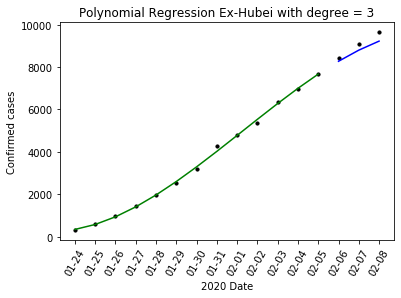

Degree 2:
RMSE of training set is 145.3798893459301
R2 score of training set is 0.9963872010424277

RMSE of test set is 712.6828547445574
R2 score of test set is -1.0494401507749278
---------------------------------------

Degree 2:
RMSE of training set is 297.6580589182098
R2 score of training set is 0.9992487131906561

---------------------------------------



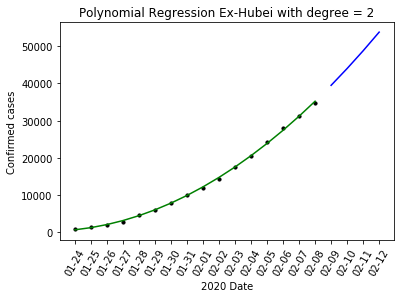

In [13]:
# See Hubei Province 
NotHubei= DXYArea[DXYArea['provinceName'] != 'Hubei Province']
 
X_train, X_test, y_train, y_test = data_processing(NotHubei)    

# select the best degree 
create_polynomial_regression_model(1, "Ex-Hubei", overall_df, X_train, X_test, y_train, y_test, draw_plot = False)
create_polynomial_regression_model(3, "Ex-Hubei", overall_df, X_train, X_test, y_train, y_test, draw_plot = True)
create_polynomial_regression_model(2, "Ex-Hubei", overall_df, X_train, X_test, y_train, y_test, draw_plot = False)

forecast_next_4_days(3, "Ex-Hubei", overall_df)